In [5]:
import pandas as pd
import pickle
from sklearn.cluster import KMeans
df = pd.read_excel('lyrics.xlsx', sheet_name='muse_v3')
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
vad_dict = {}

with open('./lyrics-updated.pkl', 'rb') as f:
    lyrics = pickle.load(f)

for index, row in df.iterrows():
    song_name = row['track']

    if song_name in lyrics:
        vad_dict[song_name] = [row['valence_tags'], row['arousal_tags'], row['dominance_tags']]



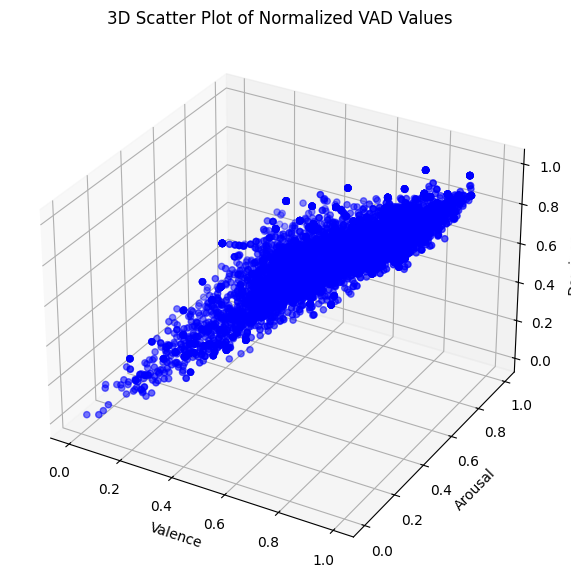

In [10]:
df = pd.DataFrame.from_dict(vad_dict, orient='index')
df.columns = ["valence", "arousal", "dominance"]
scaler = MinMaxScaler()
normalized_vad = scaler.fit_transform(df)
df_normalized = pd.DataFrame(normalized_vad, columns=["valence", "arousal", "dominance"], index=df.index)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_normalized['valence'], df_normalized['arousal'], df_normalized['dominance'], c='b', marker='o')

ax.set_xlabel('Valence')
ax.set_ylabel('Arousal')
ax.set_zlabel('Dominance')
plt.title("3D Scatter Plot of Normalized VAD Values")

# Show plot
plt.show()

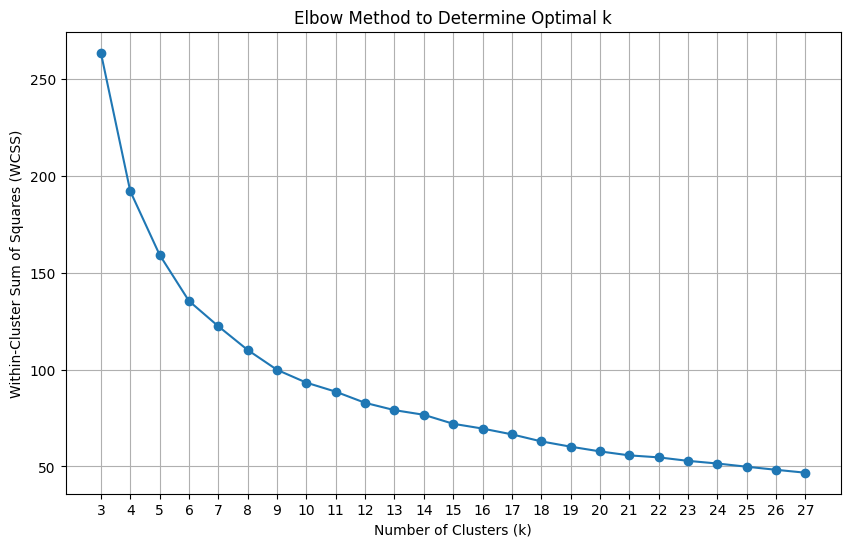

In [11]:
# Calculate WCSS for a range of k values from 3 to 27
wcss = []
k_range = range(3, 28)  # from 3 to 27

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_normalized)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS for k-means

# Plot WCSS to find the elbow point
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method to Determine Optimal k')
plt.xticks(k_range)
plt.grid(True)
plt.show()


In [16]:
kmeans = KMeans(n_clusters=27, random_state=42)
labels = kmeans.fit_predict(df_normalized)

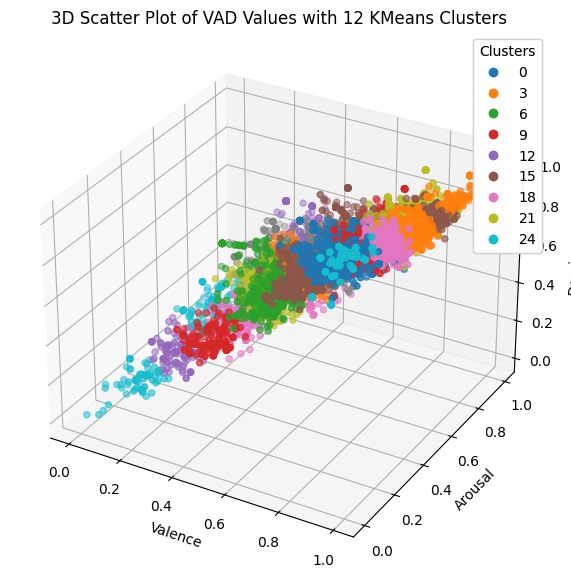

In [17]:
df_normalized['cluster'] = labels

# Plot the 3D scatter plot with different colors for each cluster
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Use a colormap to assign a color to each cluster
scatter = ax.scatter(df_normalized['valence'], df_normalized['arousal'], df_normalized['dominance'], 
                     c=df_normalized['cluster'], cmap='tab10', marker='o')

# Add legend for clusters
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

# Label the axes
ax.set_xlabel('Valence')
ax.set_ylabel('Arousal')
ax.set_zlabel('Dominance')
plt.title("3D Scatter Plot of VAD Values with 12 KMeans Clusters")

# Show plot
plt.show()

In [32]:
df['cluster'] = labels
df.groupby('cluster').agg({'valence':  ['min', 'mean', 'max'], 'arousal':  ['min', 'mean', 'max'], 'dominance':  ['min', 'mean', 'max']})

valence                       arousal                     dominance  \
              min      mean       max       min      mean       max       min   
cluster                                                                         
0        4.865000  5.878284  6.538000  2.700000  3.481607  4.105797  5.251111   
1        5.540000  6.617546  7.500000  2.460000  3.090484  3.500000  5.440000   
2        5.023333  6.188912  7.315000  3.836000  4.510534  5.344348  4.630000   
3        6.643429  7.413407  8.048750  4.380000  4.868060  5.396000  5.800000   
4        3.931667  5.086233  5.885937  3.280667  3.838909  4.245000  4.233137   
5        7.205000  7.975002  8.470000  5.493333  5.933945  6.950000  6.565000   
6        3.035398  4.392094  5.425000  1.493333  3.057405  3.994286  3.737500   
7        2.262500  3.676624  4.566667  4.112500  4.693733  5.388000  3.159606   
8        5.900000  6.642497  7.523684  3.350000  3.852141  4.489737  5.450000   
9        2.388000  3.383303  4.506667  0.835000  2.021376  2.565000  2.525000   
10       4.398966  5.933430  6.875000  5.573333  6.326769  7.270000  4.620000   
11       1.225000  2.229843  3.525000  0.955000  2.149788  3.470000  1.590000   
12       2.805000  3.811651  4.925000  4.966667  5.669108  6.450000  4.150000   
13       6.838409  7.639215  8.235000  5.083333  5.566255  6.075000  5.930000   
14       4.453333  5.409051  6.380000  1.844444  3.305269  4.047711  4.717500   
15       4.120000  5.434298  6.571840  4.907097  5.462506  6.235000  4.405000   
16       3.690000  4.796571  5.826119  3.550000  4.137349  4.936667  3.334935   
17       6.460000  7.162951  7.930000  3.430000  4.188600  4.595000  5.500000   
18       2.866800  3.551698  4.264000  2.496667  3.022883  4.061667  2.120000   
19       4.009130  5.253692  6.093333  4.050000  4.489930  5.235000  4.105714   
20       1.995556  2.941365  4.140000  4.370000  5.446107  6.620000  3.210000   
21       2.852673  4.042166  5.110000  2.772098  3.630532  4.354074  3.283209   
22       6.522500  7.251345  8.025000  5.633529  6.207904  7.035000  5.618000   
23       6.113053  6.880604  7.560000  4.581176  5.187580  5.780000  5.356667   
24       0.471429  1.594621  2.565789  0.388723  1.334665  2.185000  0.480000   
25       1.678317  2.524066  3.200000  2.394752  3.340529  4.260000  2.380977   
26       6.470000  7.059611  7.482000  1.670000  2.414418  3.170000  5.760000   

                             
             mean       max  
cluster                      
0        5.920835  6.840000  
1        6.410071  7.095000  
2        5.553891  6.310000  
3        6.454272  7.176667  
4        4.971546  5.895000  
5        7.128261  7.320000  
6        4.714433  5.790000  
7        4.284603  5.195000  
8        6.044767  6.840000  
9        3.231495  4.183333  
10       5.608701  6.350000  
11       2.325395  3.093333  
12       4.895363  5.748621  
13       6.633774  7.184468  
14       5.354425  6.140000  
15       5.598050  6.950000  
16       4.419977  5.410000  
17       6.382550  7.225000  
18       3.288422  3.930000  
19       4.933568  5.960000  
20       3.963707  4.730000  
21       4.084814  4.987500  
22       6.223452  7.000000  
23       6.155430  6.950000  
24       1.667289  2.394737  
25       3.328235  3.986667  
26       6.697204  7.440000

In [19]:
df

,valence,arousal,dominance,cluster
Feedback,7.280923,6.428462,5.999231,22
Limp,3.737211,5.610204,4.626735,12
Depression,2.085000,2.972500,2.935000,25
When Girls Telephone Boys,3.910741,4.915556,4.631852,7
Requiem,3.913333,3.163333,3.293333,18
...,...,...,...,...
If Jeff Buckley Had Lived,3.520000,4.455000,4.455000,7
The Draft Is Coming,4.350000,4.180000,5.215000,4
Need Air,3.555000,1.305000,2.970000,9
Beginners,5.350000,2.912500,4.967500,14


In [20]:
df.cluster.value_counts()

cluster
2     902
3     415
23    403
0     401
8     401
21    348
6     345
17    343
14    326
19    319
15    314
22    299
4     289
13    265
12    249
1     246
16    242
9     181
18    181
7     172
20    170
10    164
5     161
25    138
26    126
11    119
24     67
Name: count, dtype: int64

In [ ]:
big_songs = {}
for index, row in df.iterrows():
    cluster = row['cluster']
    if cluster not in big_songs:
        big_songs[cluster] = lyrics[index][0]
    else:
        big_songs[cluster] = big_songs[cluster] + lyrics[index][0]

for song in big_songs.keys():
    print(song)
    print(big_songs[song])
    print('------------------------------------------------------------------------------')